In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#from colour import Color

In [2]:
df = pd.read_csv('AppleStore.csv')
df.head()

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45


In [3]:
labels = df['prime_genre'].unique()
print(type(labels))
sizes = []
for label in labels:
    sizes.append(df[df['prime_genre']==label].shape[0])
colors = ['red','green','yellow','blue','orange','purple','cyan','magenta','lime','pink','teal','lavender','brown','beige','maroon','black','olive','white','navy','grey','white','black','red']

<class 'numpy.ndarray'>


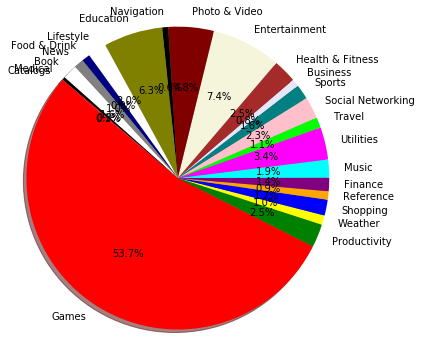

In [4]:
# Plot
fig = plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()
fig.savefig('pie_chart.png', dpi=fig.dpi)

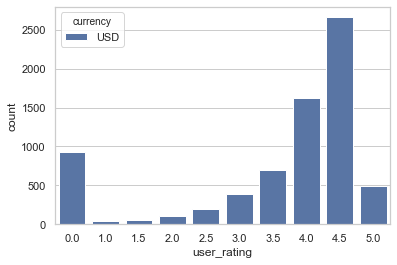

In [89]:
#plt.scatter(df['sup_devices.num'],df['lang.num'],alpha=0.5)
sns.countplot(x='user_rating',data=df,hue="currency")

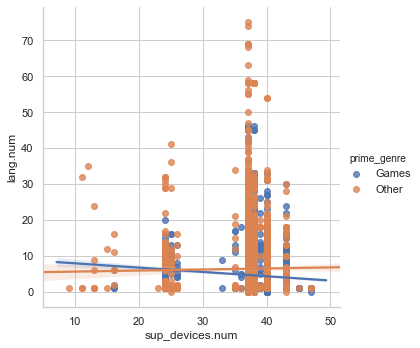

In [100]:
df_copy = df.copy()
df_copy.loc[df_copy['prime_genre']!='Games','prime_genre'] = 'Other'
sns.lmplot(x = 'sup_devices.num',y = 'lang.num',data = df_copy,hue = 'prime_genre')

C:\Users\magshimim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\magshimim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


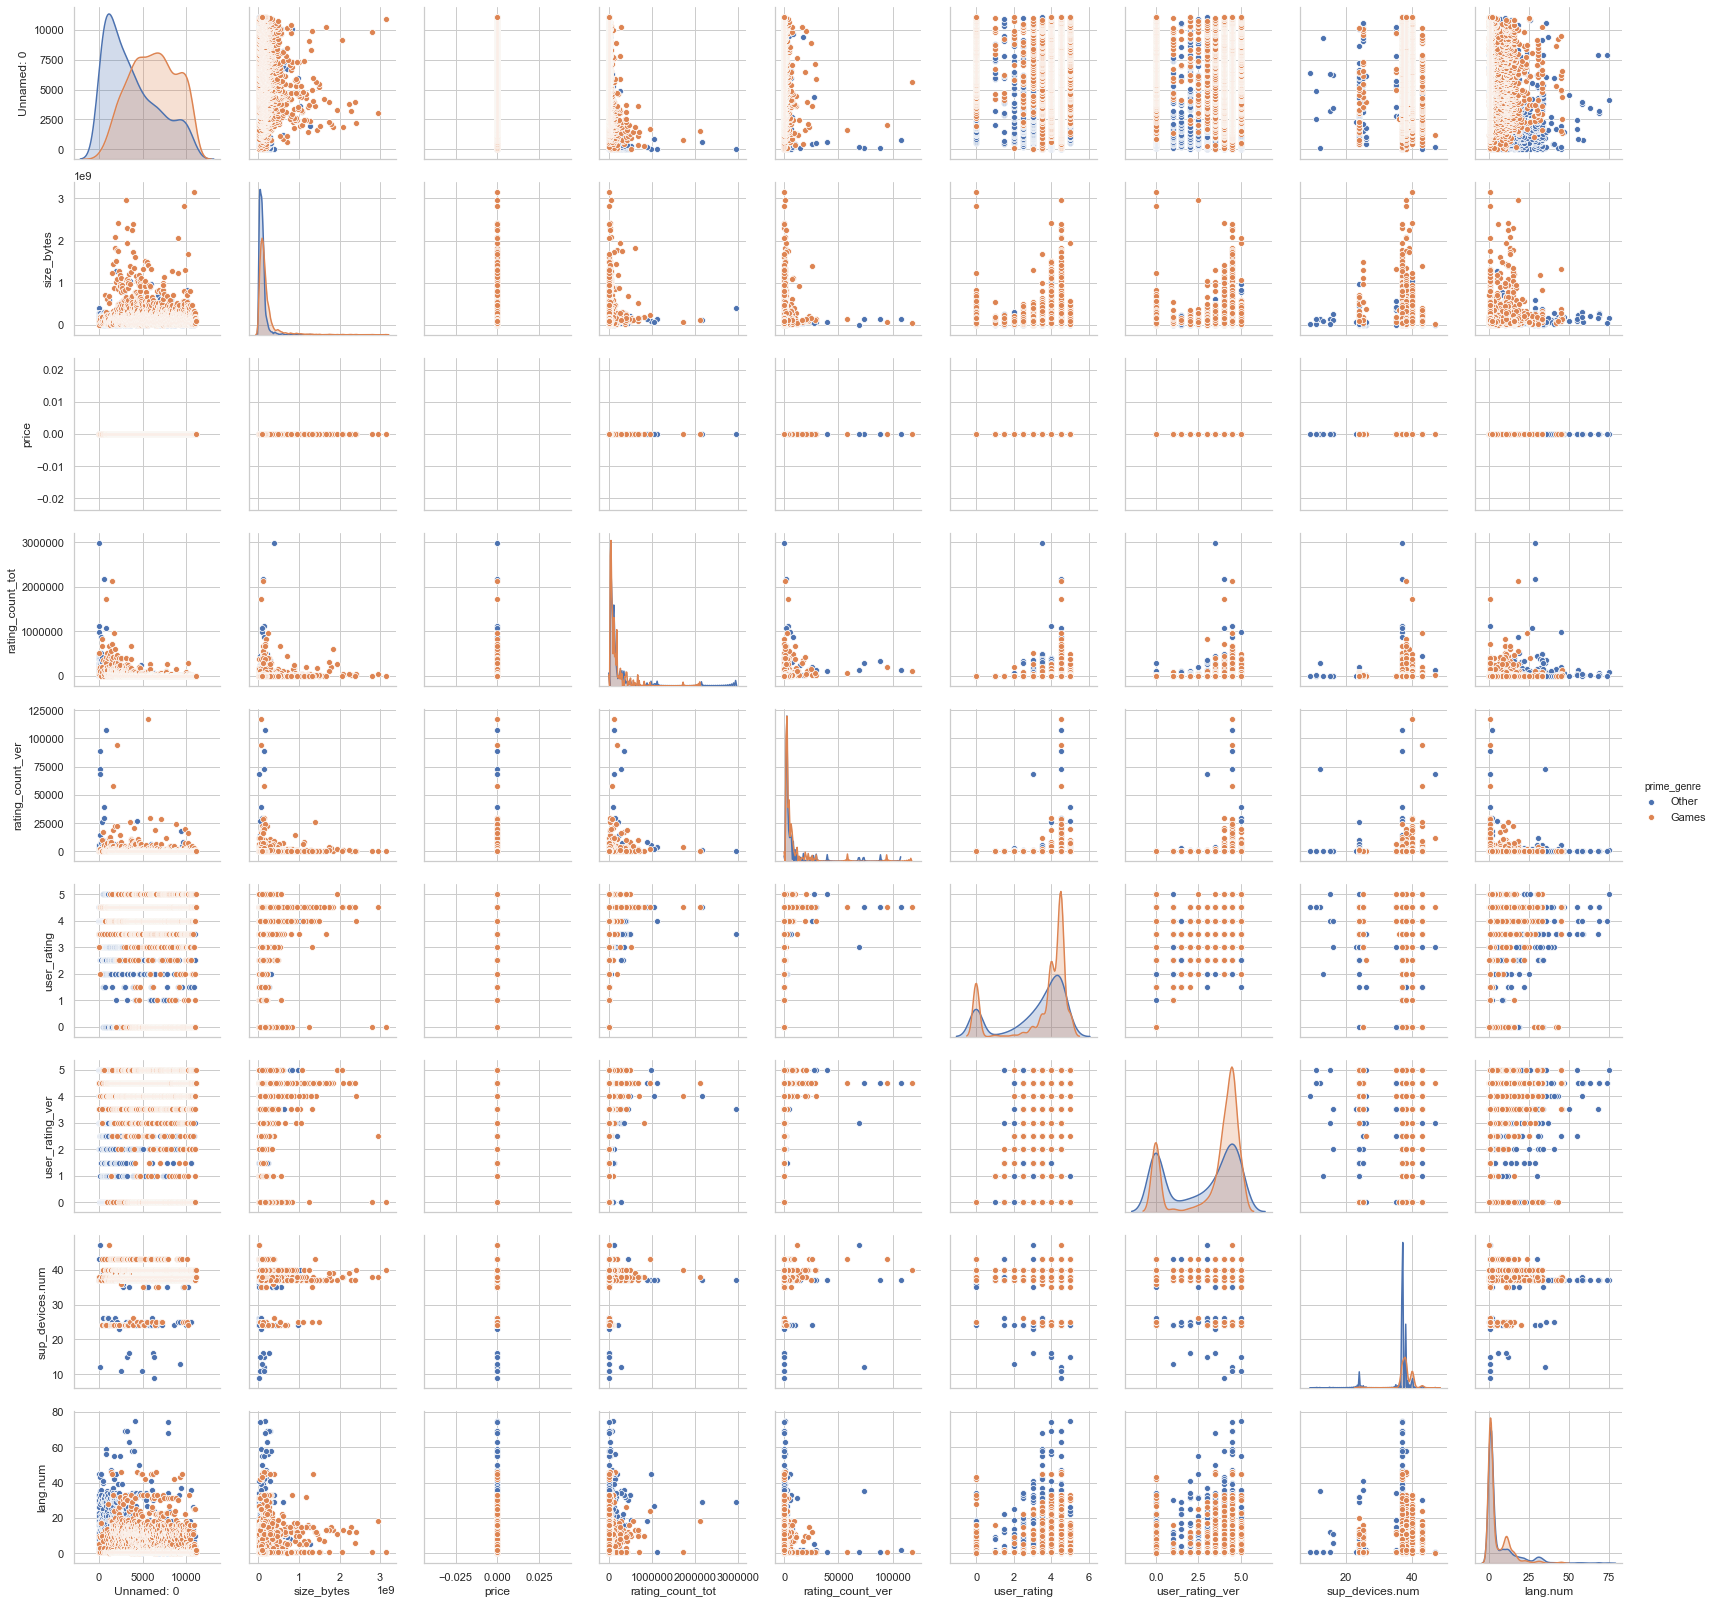

In [101]:
sns_plot = sns.pairplot(df_copy[df_copy['price']==0],hue='prime_genre')
sns_plot.savefig("pair_plot-free.png")

C:\Users\magshimim\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\magshimim\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


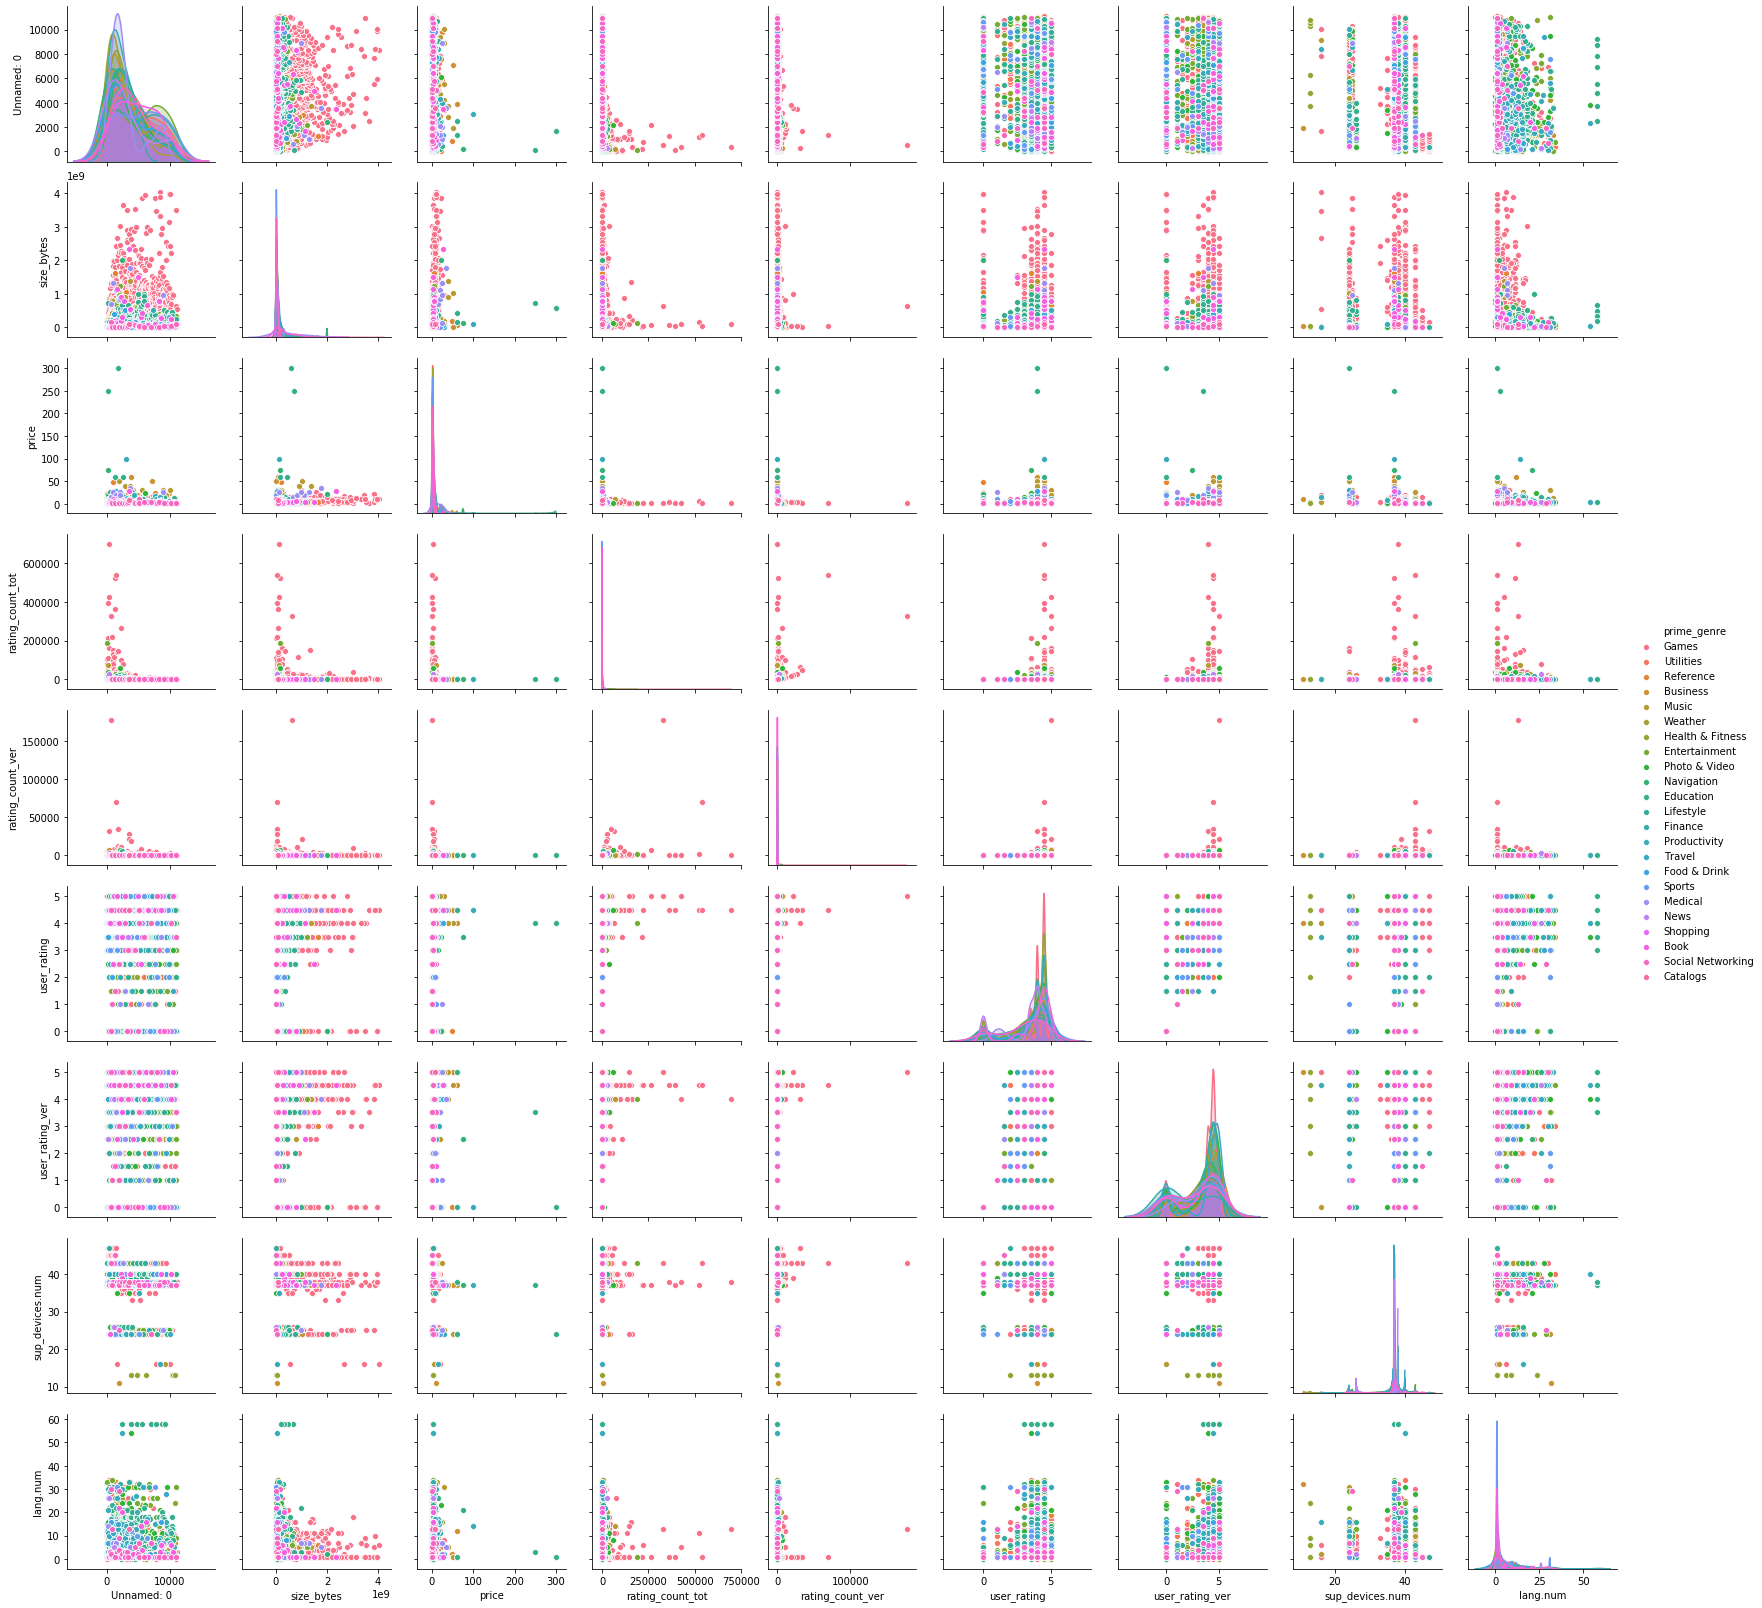

In [8]:
sns_plot = sns.pairplot(df[df['price']>0],hue='prime_genre')
sns_plot.savefig("pair_plot-payment.png")

In [29]:
df.iloc[df['rating_count_tot'].sort_values()[-16:-1].index]

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
1634,1895,Injustice: Gods Among Us,1829599232,USD,0.00,612532,410,4.5,4.5,2.15.1,Games,39,13
3042,3637,Crossy Road - Endless Arcade Hopper,165471232,USD,0.00,669079,1087,4.5,4.5,1.5.4,Games,38,13
990,1143,CSR Racing,524803072,USD,0.00,677247,2029,4.5,4.5,4.0.1,Games,37,10
343,386,Solitaire,101943296,USD,0.00,679055,9673,4.5,4.5,4.11.2,Games,38,11
348,393,Fruit Ninja Classic,104590336,USD,1.99,698516,132,4.5,4.0,2.3.9,Games,38,13
1246,1450,Subway Surfers,156038144,USD,0.00,706110,97,4.5,4.0,1.72.1,Games,38,1
275,310,Angry Birds,175966208,USD,0.00,824451,107,4.5,3.0,7.4.0,Games,38,10
178,202,Spotify Music,132510720,USD,0.00,878563,8253,4.5,4.5,8.4.3,Music,37,18
1493,1731,Candy Crush Saga,222846976,USD,0.00,961794,2453,4.5,4.5,1.101.0,Games,43,24
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45


In [10]:
ratio = ((df['user_rating']+df['user_rating_ver'])/2.0)*df['rating_count_tot']
df.iloc[ratio.sort_values()[-16:-1].index]

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
1634,1895,Injustice: Gods Among Us,1829599232,USD,0.00,612532,410,4.5,4.5,2.15.1,Games,39,13
348,393,Fruit Ninja Classic,104590336,USD,1.99,698516,132,4.5,4.0,2.3.9,Games,38,13
1246,1450,Subway Surfers,156038144,USD,0.00,706110,97,4.5,4.0,1.72.1,Games,38,1
3042,3637,Crossy Road - Endless Arcade Hopper,165471232,USD,0.00,669079,1087,4.5,4.5,1.5.4,Games,38,13
990,1143,CSR Racing,524803072,USD,0.00,677247,2029,4.5,4.5,4.0.1,Games,37,10
343,386,Solitaire,101943296,USD,0.00,679055,9673,4.5,4.5,4.11.2,Games,38,11
275,310,Angry Birds,175966208,USD,0.00,824451,107,4.5,3.0,7.4.0,Games,38,10
178,202,Spotify Music,132510720,USD,0.00,878563,8253,4.5,4.5,8.4.3,Music,37,18
1493,1731,Candy Crush Saga,222846976,USD,0.00,961794,2453,4.5,4.5,1.101.0,Games,43,24
755,863,Pinterest,74778624,USD,0.00,1061624,1814,4.5,4.0,6.26,Social Networking,37,27


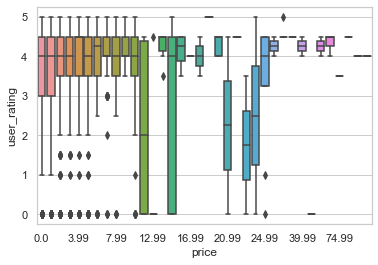

In [27]:
sns.set(style='whitegrid')
plot = sns.boxplot( y=df["user_rating"],x=df['price'])
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

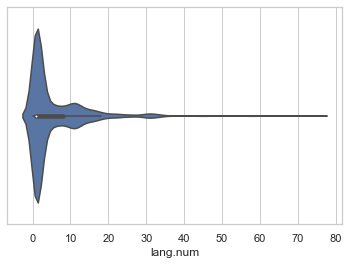

In [61]:
sns_plot = sns.violinplot(x=df['lang.num'])
sns_plot.get_figure().savefig("vilonplot.png")

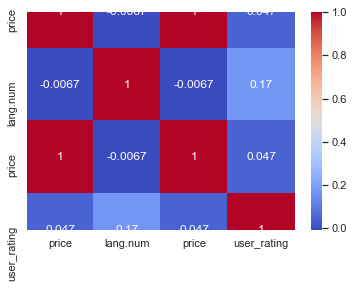

In [60]:
#heatmap
sns_plot = sns.heatmap(df[['price','lang.num','price','user_rating']].corr(),cmap='coolwarm',annot=True)
sns_plot.get_figure().savefig("heatmap.png")

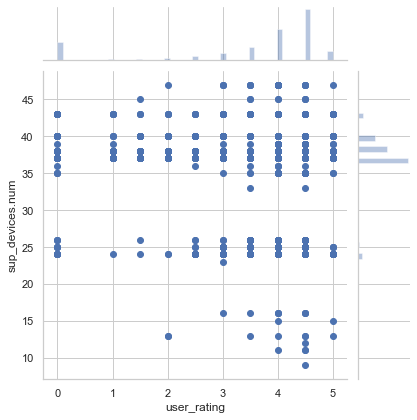

In [67]:
sns.jointplot(x='user_rating',y='sup_devices.num', data=df)

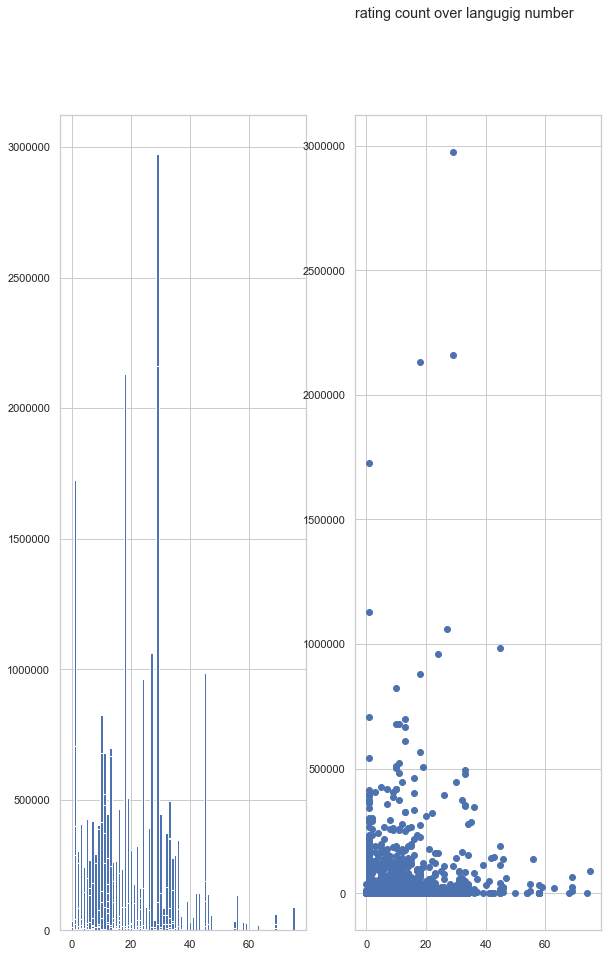

In [80]:
plt.figure(figsize=(15, 15))

plt.subplot(131)
plt.bar(df['lang.num'], df['rating_count_tot'])
plt.subplot(132)
plt.scatter(df['lang.num'], df['rating_count_tot'])
plt.suptitle('rating count over langugig number')
plt.show()

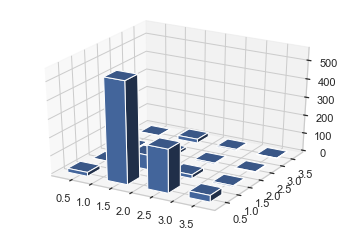

In [87]:
from mpl_toolkits.mplot3d import Axes3D 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(df['lang.num'], df['rating_count_tot'], bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
fig.savefig('3Dhistogram.png')
plt.show()